Import necessary Python libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path='/content/online_course_engagement_data.csv'
df=pd.read_csv(file_path)
df.head()

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [ ]:
df.shape

(9000, 9)

Data Preprocessing

In [ ]:
df.dtypes

UserID                     int64
CourseCategory            object
TimeSpentOnCourse        float64
NumberOfVideosWatched      int64
NumberOfQuizzesTaken       int64
QuizScores               float64
CompletionRate           float64
DeviceType                 int64
CourseCompletion           int64
dtype: object

In [ ]:
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('CourseCompletion',axis=1)
y=df['CourseCompletion']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
df['NumberOfQuizzesTaken'].value_counts()

NumberOfQuizzesTaken
9     872
10    847
5     839
6     838
8     828
2     827
4     808
7     805
1     789
3     780
0     767
Name: count, dtype: int64

In [ ]:
df['NumberOfVideosWatched'].value_counts()

NumberOfVideosWatched
3     463
4     463
15    459
6     454
12    449
16    437
14    433
11    432
13    432
20    431
8     429
19    427
2     422
9     421
10    419
18    415
17    408
0     408
5     406
1     401
7     391
Name: count, dtype: int64

In [ ]:
Degree Centrality

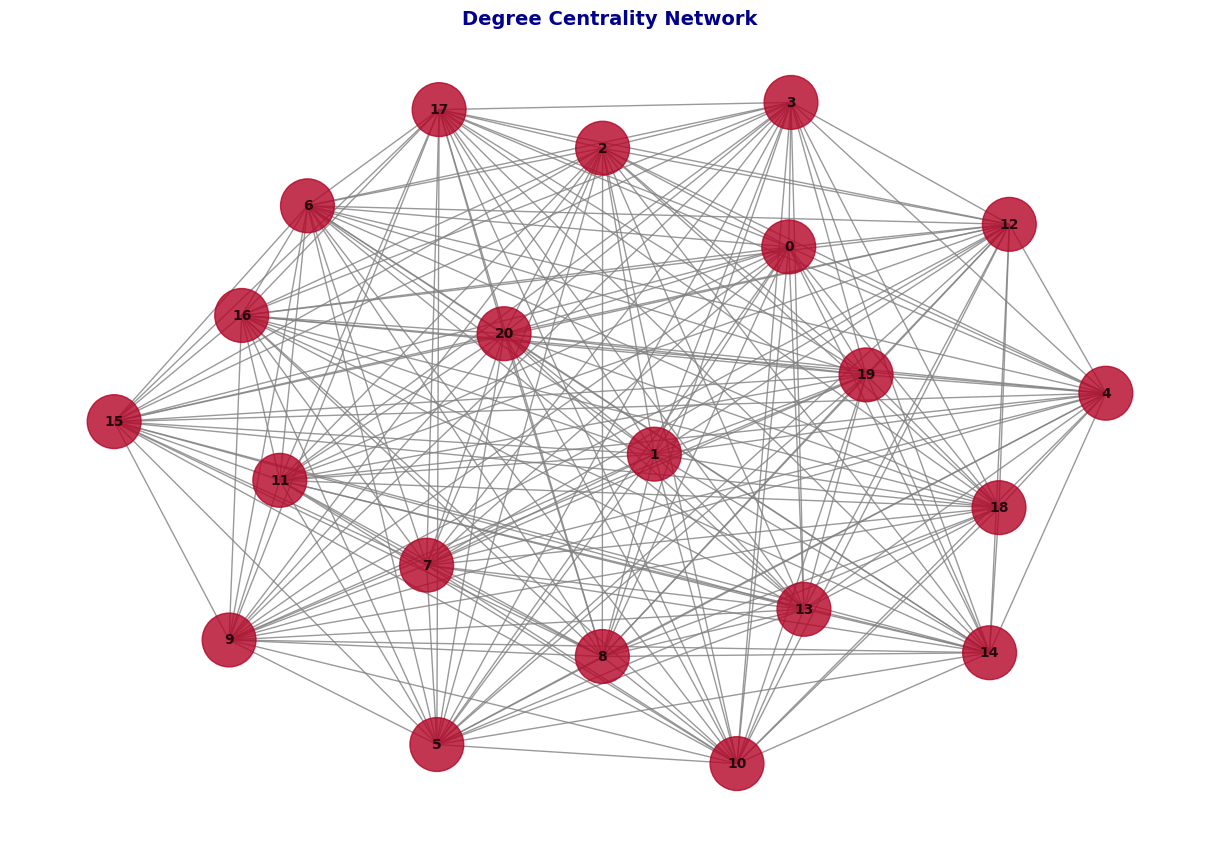

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
quiz_counts = df["NumberOfVideosWatched"].value_counts().to_dict()
g = nx.Graph()
g.add_nodes_from(quiz_counts.keys())
for quiz_count in quiz_counts:
    for other_quiz_count in quiz_counts:
        if quiz_count != other_quiz_count:
            g.add_edge(quiz_count, other_quiz_count)

# Compute degree centrality
degree_centrality = nx.degree_centrality(g)
centrality_values = list(degree_centrality.values())
cmap = plt.get_cmap("coolwarm")
node_colors = [cmap(val) for val in centrality_values]
node_sizes = [v * 1500 for v in centrality_values]
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(g, seed=42)
nx.draw(
    g,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color="gray",
    node_size=node_sizes,
    alpha=0.8,
    font_weight="bold"
)
plt.title("Degree Centrality Network", fontsize=14, fontweight="bold", color="darkblue")
plt.show()


Closeness Centrality

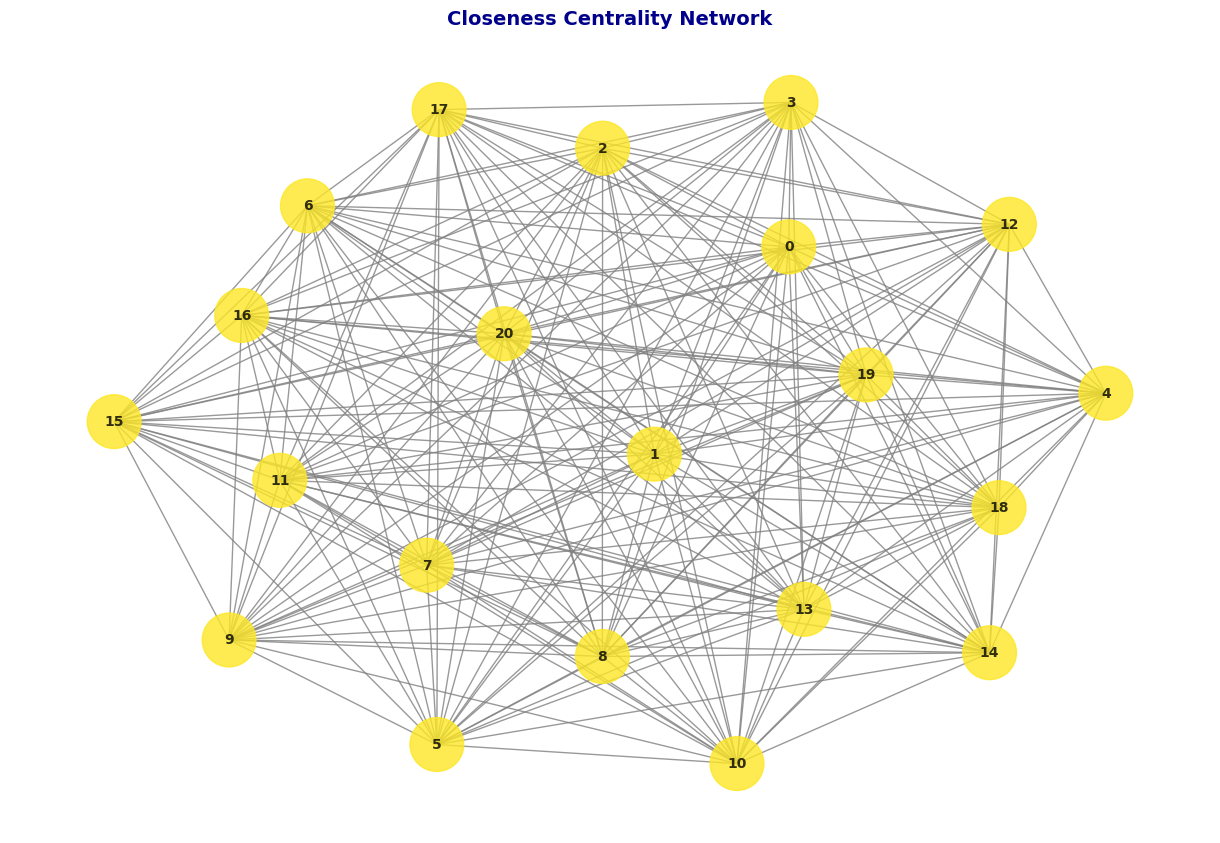

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure df is already loaded)
quiz_counts = df["NumberOfVideosWatched"].value_counts().to_dict()

# Create graph
g = nx.Graph()
g.add_nodes_from(quiz_counts.keys())

# Add edges (fully connected structure)
for quiz_count in quiz_counts:
    for other_quiz_count in quiz_counts:
        if quiz_count != other_quiz_count:
            g.add_edge(quiz_count, other_quiz_count)

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(g)

# Convert to DataFrame for sorting
closeness_df = pd.DataFrame(closeness_centrality.items(), columns=["NumberOfVideosWatched", "ClosenessCentrality"])
closeness_df = closeness_df.sort_values(by="ClosenessCentrality", ascending=False)

# Map centrality values to colors using Seaborn's coolwarm colormap
centrality_values = list(closeness_centrality.values())
cmap = plt.get_cmap("viridis")  # Choose a color gradient
node_colors = [cmap(val) for val in centrality_values]  # Apply colors based on centrality

# Scale node size based on centrality
node_sizes = [v * 1500 for v in centrality_values]  # Adjust size for better visibility

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(g, seed=42)  # Ensures consistent layout
nx.draw(
    g,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color="gray",
    node_size=node_sizes,
    alpha=0.8,  # Transparency for better readability
    font_size=10,
    font_weight="bold"
)

# Add title
plt.title("Closeness Centrality Network", fontsize=14, fontweight="bold", color="darkblue")
plt.show()


Betweenness Centrality

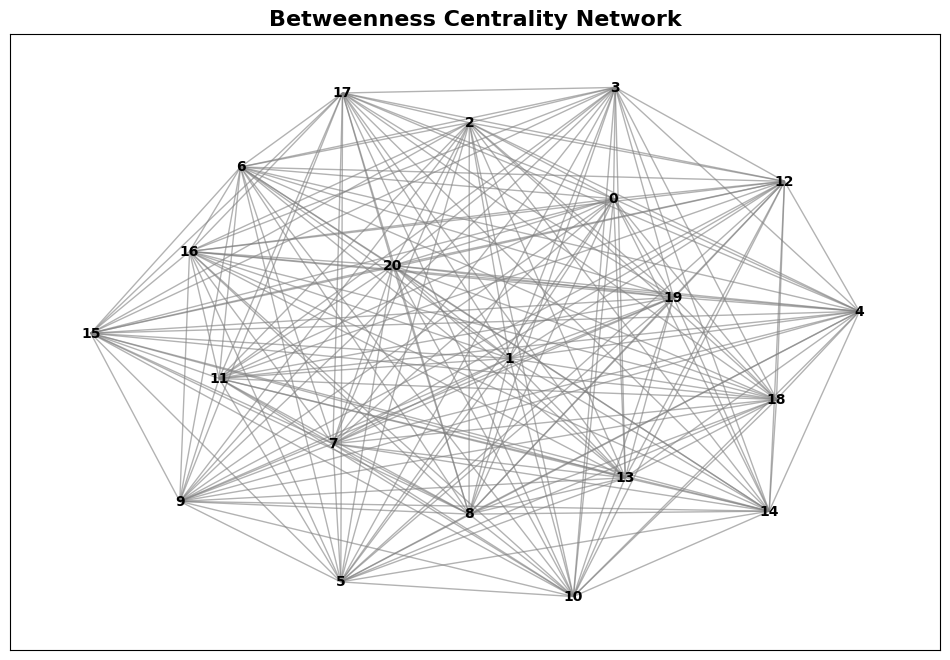

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure df is already loaded)
quiz_counts = df["NumberOfVideosWatched"].value_counts().to_dict()

# Create graph
g = nx.Graph()
g.add_nodes_from(quiz_counts.keys())

# Add edges (fully connected structure)
for quiz_count in quiz_counts:
    for other_quiz_count in quiz_counts:
        if quiz_count != other_quiz_count:
            g.add_edge(quiz_count, other_quiz_count)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(g)

# Convert to DataFrame for sorting
betweenness_df = pd.DataFrame(betweenness_centrality.items(), columns=["NumberOfVideosWatched", "BetweennessCentrality"])
betweenness_df = betweenness_df.sort_values(by="BetweennessCentrality", ascending=False)

# Use a fixed yellow color for all nodes
node_color = "gold"

# Scale node size based on centrality
node_sizes = [v * 3500 for v in betweenness_centrality.values()]  # Slightly larger nodes

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(g, seed=42)  # Ensures consistent layout

# Draw nodes with black edges for better contrast
nx.draw_networkx_nodes(
    g, pos, node_color=node_color, node_size=node_sizes, edgecolors="black", linewidths=1.5, alpha=0.9
)

# Draw edges in gray
nx.draw_networkx_edges(g, pos, edge_color="gray", alpha=0.6)

# Draw labels in bold black font
nx.draw_networkx_labels(g, pos, font_size=10, font_weight="bold", font_color="black")

# Add title
plt.title("Betweenness Centrality Network", fontsize=16, fontweight="bold", color="black")
plt.show()


Eigen centrality

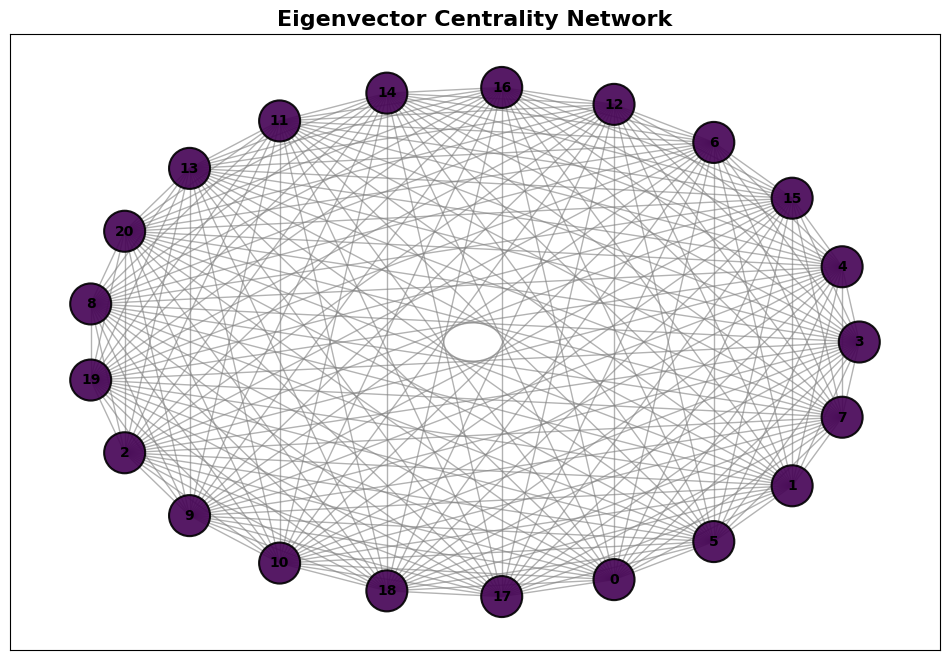

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

quiz_counts = df["NumberOfVideosWatched"].value_counts().to_dict()
g = nx.Graph()
g.add_nodes_from(quiz_counts.keys())

for quiz_count in quiz_counts:
    for other_quiz_count in quiz_counts:
        if quiz_count != other_quiz_count:
            g.add_edge(quiz_count, other_quiz_count)

# Compute Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(g, max_iter=1000)
eigenvector_df = pd.DataFrame(eigenvector_centrality.items(), columns=["NumberOfVideosWatched", "EigenvectorCentrality"])
eigenvector_df = eigenvector_df.sort_values(by="EigenvectorCentrality", ascending=False)

centrality_values = np.array(list(eigenvector_centrality.values()))
norm = plt.Normalize(vmin=centrality_values.min(), vmax=centrality_values.max())
cmap = plt.get_cmap("viridis")
node_colors = [cmap(norm(val)) for val in centrality_values]
node_sizes = [v * 4000 for v in centrality_values]
pos = nx.kamada_kawai_layout(g)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(
    g, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9, edgecolors="black", linewidths=1.5
)
nx.draw_networkx_edges(g, pos, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(g, pos, font_size=10, font_weight="bold", font_color="black")

plt.title("Eigenvector Centrality Network", fontsize=16, fontweight="bold", color="black")
plt.show()


Clustering Coefficient

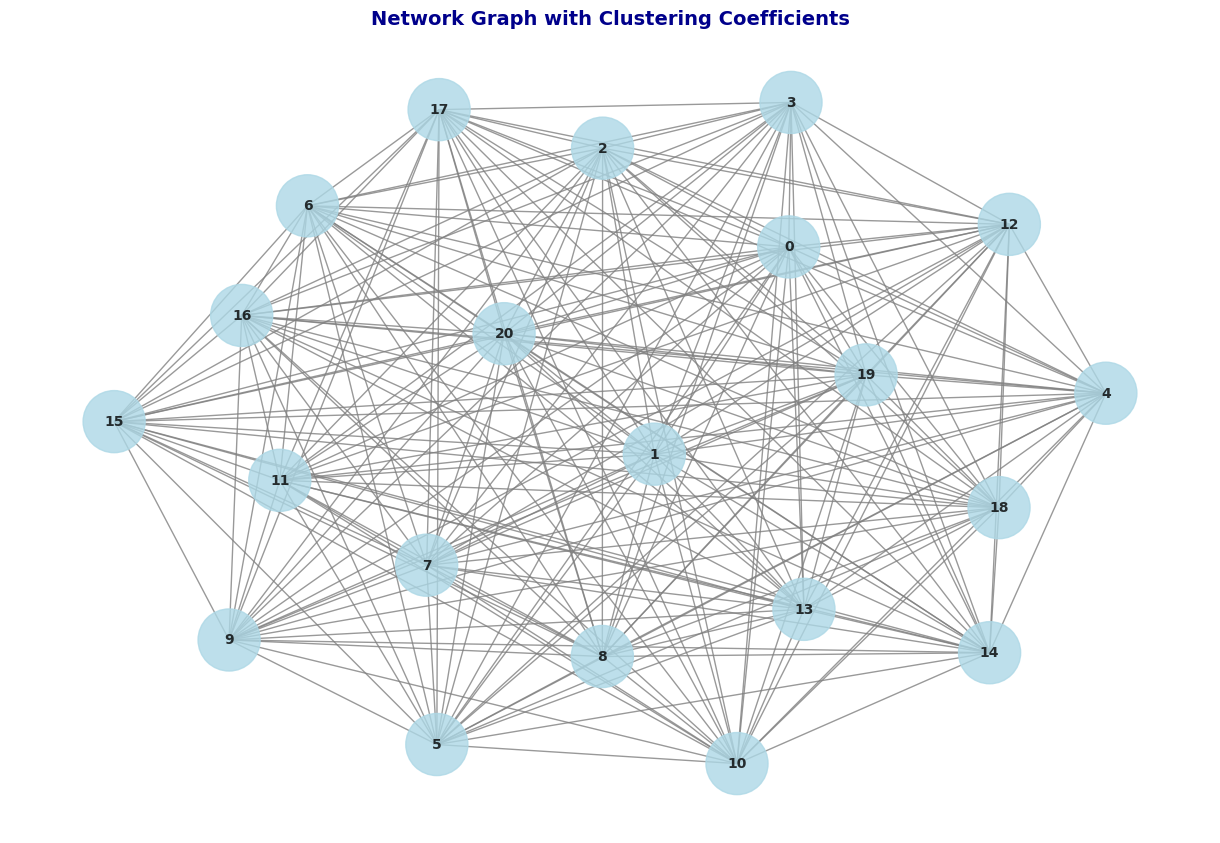

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
quiz_counts = df["NumberOfVideosWatched"].value_counts().to_dict()
g = nx.Graph()
g.add_nodes_from(quiz_counts.keys())
for quiz_count in quiz_counts:
    for other_quiz_count in quiz_counts:
        if quiz_count != other_quiz_count:
            g.add_edge(quiz_count, other_quiz_count)

# Compute clustering coefficient
clustering_coefficients = nx.clustering(g)
clustering_df = pd.DataFrame(clustering_coefficients.items(), columns=["NumberOfVideosWatched", "ClusteringCoefficient"])
clustering_df = clustering_df.sort_values(by="ClusteringCoefficient", ascending=False)
node_sizes = [v * 2000 for v in clustering_coefficients.values()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(g, seed=42)
nx.draw(
    g,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=node_sizes,
    alpha=0.8,
    font_size=10,
    font_weight="bold"
)
plt.title("Network Graph with Clustering Coefficients", fontsize=14, fontweight="bold", color="darkblue")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['CourseCategory']
label_encoder = LabelEncoder()
for col in columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
df = df.drop(columns=columns)
df.head()

UserID  TimeSpentOnCourse  NumberOfVideosWatched  NumberOfQuizzesTaken  \
0    5618          29.979719                     17                     3   
1    4326          27.802640                      1                     5   
2    5849          86.820485                     14                     2   
3    4992          35.038427                     17                    10   
4    3866          92.490647                     16                     0   

   QuizScores  CompletionRate  DeviceType  CourseCompletion  \
0   50.365656       20.860773           1                 0   
1   62.615970       65.632415           1                 0   
2   78.458962       63.812007           1                 1   
3   59.198853       95.433162           0                 1   
4   98.428285       18.102478           0                 0   

   CourseCategory_encoded  
0                       2  
1                       0  
2                       0  
3                       4  
4                       3

In [ ]:
df.columns = df.columns.str.strip()
df = df.drop(columns=["UserID"], errors="ignore")

In [ ]:
X =df.drop(['CourseCompletion'], axis=1)
Y =df['CourseCompletion']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
Xtrain_balanced, Ytrain_balanced = smote.fit_resample(X, Y)
print("Balanced Xtrain shape:", Xtrain_balanced.shape)
print("Balanced Ytrain shape:", Ytrain_balanced.shape)

Balanced Xtrain shape: (10864, 7)
Balanced Ytrain shape: (10864,)


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain_balanced, Ytrain_balanced, random_state=123, test_size=0.2)

In [ ]:
Xtrain.shape

(8691, 7)

In [ ]:
Xtest.shape

(2173, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtrain

array([[-1.35040246,  1.31930496, -1.3858234 , ..., -0.53889315,
         1.07444743,  0.75640481],
       [ 1.70154987,  0.12984238,  1.56554124, ...,  1.61081451,
         1.07444743,  0.02556388],
       [-1.40713936, -1.7393131 ,  1.23761183, ..., -0.44258479,
        -0.93071096,  0.75640481],
       ...,
       [ 1.18009815, -1.39946665, -1.05789399, ..., -0.45726521,
         1.07444743, -1.43611798],
       [-1.02424635, -0.21000407,  1.23761183, ...,  0.06080968,
        -0.93071096,  0.02556388],
       [-1.06251718,  1.31930496,  0.58175303, ..., -0.88454839,
        -0.93071096,  0.75640481]])

In [ ]:
Xtest = scaler.transform(Xtest)
Xtest

array([[ 1.21514482,  0.29976561,  0.90968243, ..., -0.12141306,
        -0.93071096, -1.43611798],
       [-0.11358503, -0.37992729,  0.90968243, ..., -1.65852765,
         1.07444743, -0.70527705],
       [ 1.63655206, -0.21000407,  0.25382362, ...,  1.03046867,
        -0.93071096,  1.48724574],
       ...,
       [-0.11245561,  0.46968883,  0.90968243, ...,  1.54849816,
        -0.93071096, -1.43611798],
       [ 0.16727431,  1.31930496, -1.05789399, ..., -1.44324719,
         1.07444743,  0.02556388],
       [ 0.06479568, -0.04008084, -1.05789399, ...,  0.66427085,
        -0.93071096, -0.70527705]])

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model_NB = GaussianNB()
model_NB.fit(Xtrain, Ytrain)
NB_model = model_NB.predict(Xtest)
acc_NB = accuracy_score(Ytest, NB_model)
acc_NB

0.8384721583064887

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, NB_model))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1092
           1       0.84      0.83      0.84      1081

    accuracy                           0.84      2173
   macro avg       0.84      0.84      0.84      2173
weighted avg       0.84      0.84      0.84      2173



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(Xtrain, Ytrain)
RF_model = model_RF.predict(Xtest)
acc_RF = accuracy_score(Ytest, RF_model)
acc_RF

0.9595029912563277

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, RF_model))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1092
           1       0.98      0.94      0.96      1081

    accuracy                           0.96      2173
   macro avg       0.96      0.96      0.96      2173
weighted avg       0.96      0.96      0.96      2173



Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model_LR = linear_model.LogisticRegression()
model_LR.fit(Xtrain, Ytrain)
LR_model = model_LR.predict(Xtest)
acc_LR = accuracy_score(Ytest, LR_model)
acc_LR

0.8053382420616659

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, LR_model))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1092
           1       0.80      0.80      0.80      1081

    accuracy                           0.81      2173
   macro avg       0.81      0.81      0.81      2173
weighted avg       0.81      0.81      0.81      2173



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(Xtrain, Ytrain)
DT_model = model_DT.predict(Xtest)
acc_DT = accuracy_score(Ytest, DT_model)
acc_DT

0.9171652093879429

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, DT_model))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1092
           1       0.92      0.92      0.92      1081

    accuracy                           0.92      2173
   macro avg       0.92      0.92      0.92      2173
weighted avg       0.92      0.92      0.92      2173



SVM

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(Xtrain, Ytrain)
SVM_model = model_SVM.predict(Xtest)
acc_SVM = accuracy_score(Ytest, SVM_model)
acc_SVM

0.878969167050161

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, SVM_model))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1092
           1       0.89      0.87      0.88      1081

    accuracy                           0.88      2173
   macro avg       0.88      0.88      0.88      2173
weighted avg       0.88      0.88      0.88      2173



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(Xtrain, Ytrain)
KNN_model = model_KNN.predict(Xtest)
acc_KNN = accuracy_score(Ytest, KNN_model)
acc_KNN

0.8674643350207087

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, KNN_model))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1092
           1       0.85      0.89      0.87      1081

    accuracy                           0.87      2173
   macro avg       0.87      0.87      0.87      2173
weighted avg       0.87      0.87      0.87      2173



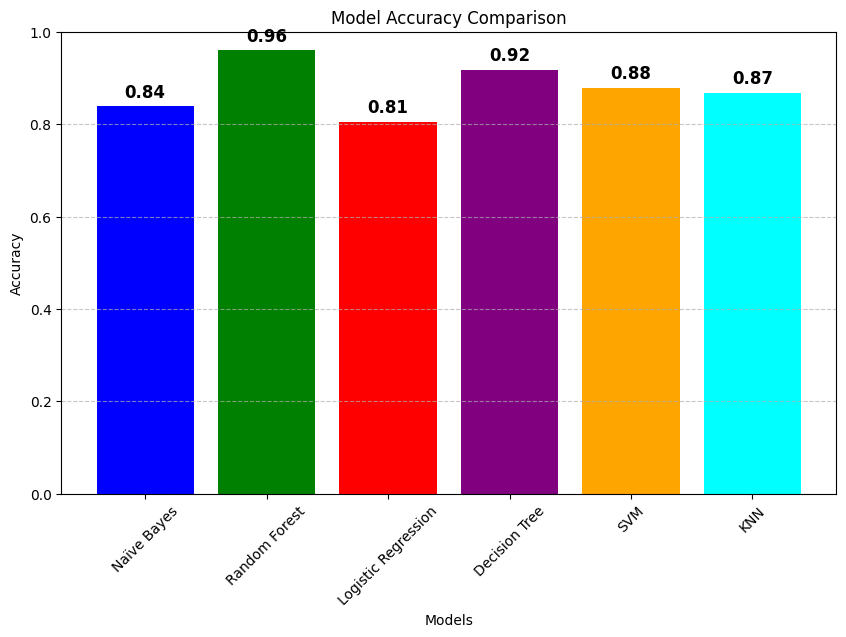

In [ ]:
# Accuracy values from the models
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
accuracies = [acc_NB, acc_RF, acc_LR, acc_DT, acc_SVM, acc_KNN]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

Model Performance

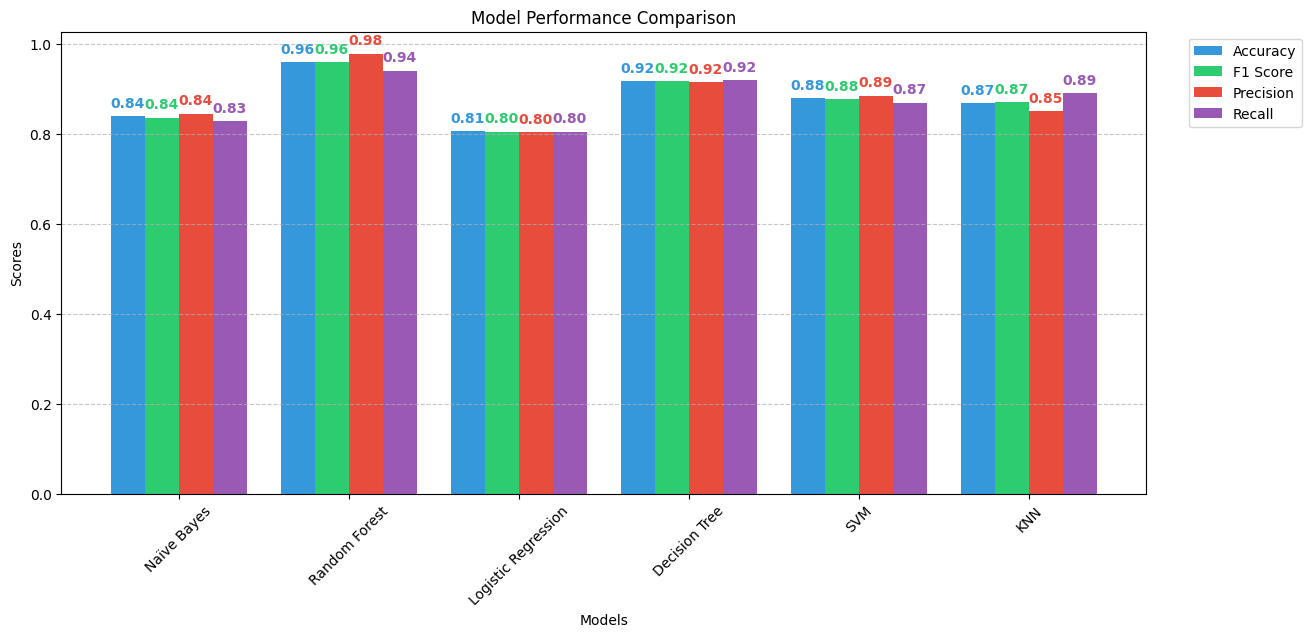

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
accuracies = [acc_NB, acc_RF, acc_LR, acc_DT, acc_SVM, acc_KNN]
f1_scores = [f1_score(Ytest, NB_model), f1_score(Ytest, RF_model), f1_score(Ytest, LR_model),
             f1_score(Ytest, DT_model), f1_score(Ytest, SVM_model), f1_score(Ytest, KNN_model)]
precisions = [precision_score(Ytest, NB_model), precision_score(Ytest, RF_model), precision_score(Ytest, LR_model),
              precision_score(Ytest, DT_model), precision_score(Ytest, SVM_model), precision_score(Ytest, KNN_model)]
recalls = [recall_score(Ytest, NB_model), recall_score(Ytest, RF_model), recall_score(Ytest, LR_model),
           recall_score(Ytest, DT_model), recall_score(Ytest, SVM_model), recall_score(Ytest, KNN_model)]
bar_width = 0.2
x = np.arange(len(model_names))
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
plt.figure(figsize=(14, 6))
plt.bar(x, accuracies, width=bar_width, label='Accuracy', color=colors[0])
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color=colors[1])
plt.bar(x + 2 * bar_width, precisions, width=bar_width, label='Precision', color=colors[2])
plt.bar(x + 3 * bar_width, recalls, width=bar_width, label='Recall', color=colors[3])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + 1.5 * bar_width, model_names, rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(model_names)):
    plt.text(i, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center', fontsize=10, fontweight='bold', color=colors[0])
    plt.text(i + bar_width, f1_scores[i] + 0.02, f"{f1_scores[i]:.2f}", ha='center', fontsize=10, fontweight='bold', color=colors[1])
    plt.text(i + 2 * bar_width, precisions[i] + 0.02, f"{precisions[i]:.2f}", ha='center', fontsize=10, fontweight='bold', color=colors[2])
    plt.text(i + 3 * bar_width, recalls[i] + 0.02, f"{recalls[i]:.2f}", ha='center', fontsize=10, fontweight='bold', color=colors[3])

plt.show()

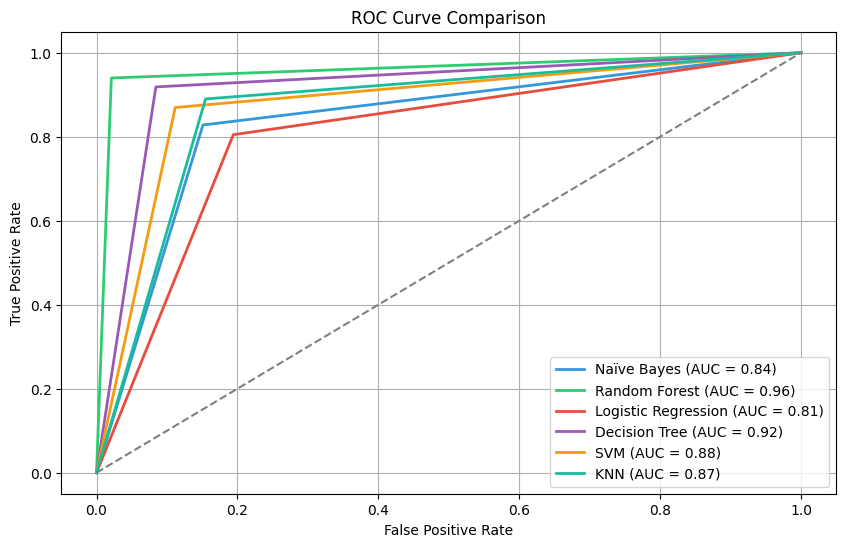

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c']

# ROC Curve Plot
plt.figure(figsize=(10, 6))
for model, name, color in zip([NB_model, RF_model, LR_model, DT_model, SVM_model, KNN_model], model_names, colors):
    fpr, tpr, _ = roc_curve(Ytest, model)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

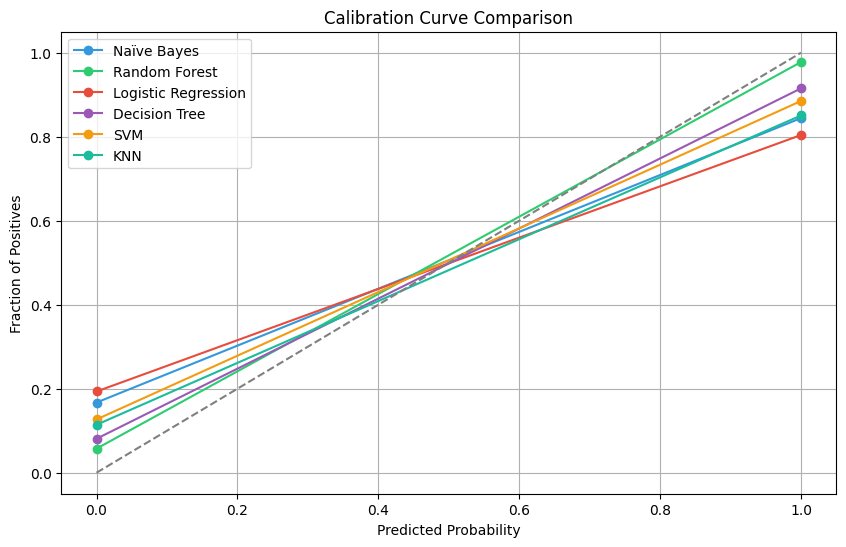

In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import numpy as np
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c']

# Calibration Curve Plot
plt.figure(figsize=(10, 6))
for model, name, color in zip([NB_model, RF_model, LR_model, DT_model, SVM_model, KNN_model], model_names, colors):
    prob_true, prob_pred = calibration_curve(Ytest, model, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', color=color, label=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve Comparison")
plt.legend(loc="upper left")
plt.grid()
plt.show()


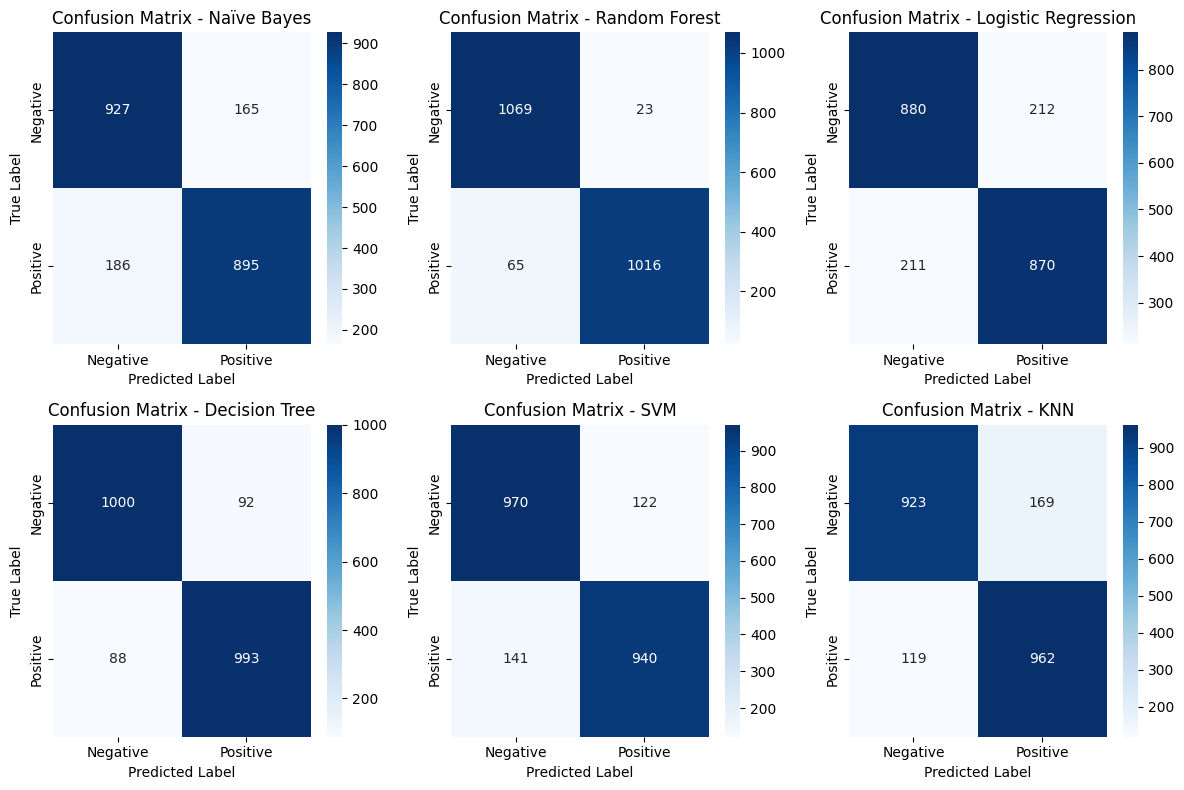

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c']  # Custom color palette

# Confusion Matrix Visualization
plt.figure(figsize=(12, 8))
for i, (model, name) in enumerate(zip([NB_model, RF_model, LR_model, DT_model, SVM_model, KNN_model], model_names)):
    cm = confusion_matrix(Ytest, model)
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()

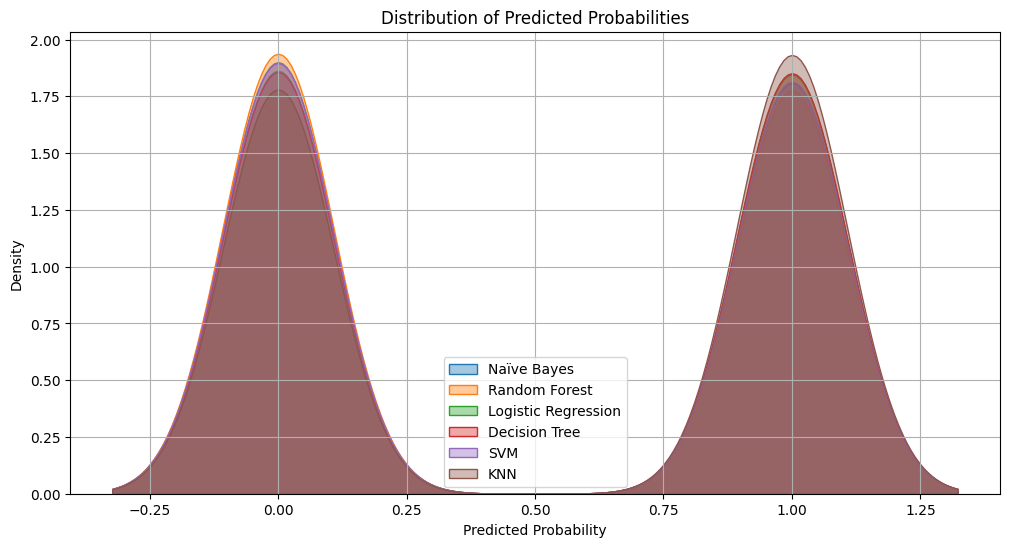

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Updated color palette

# Distribution Plot
plt.figure(figsize=(12, 6))
for model, name, color in zip([NB_model, RF_model, LR_model, DT_model, SVM_model, KNN_model], model_names, colors):
    sns.kdeplot(model, label=name, color=color, fill=True, alpha=0.4)

plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.grid()
plt.show()

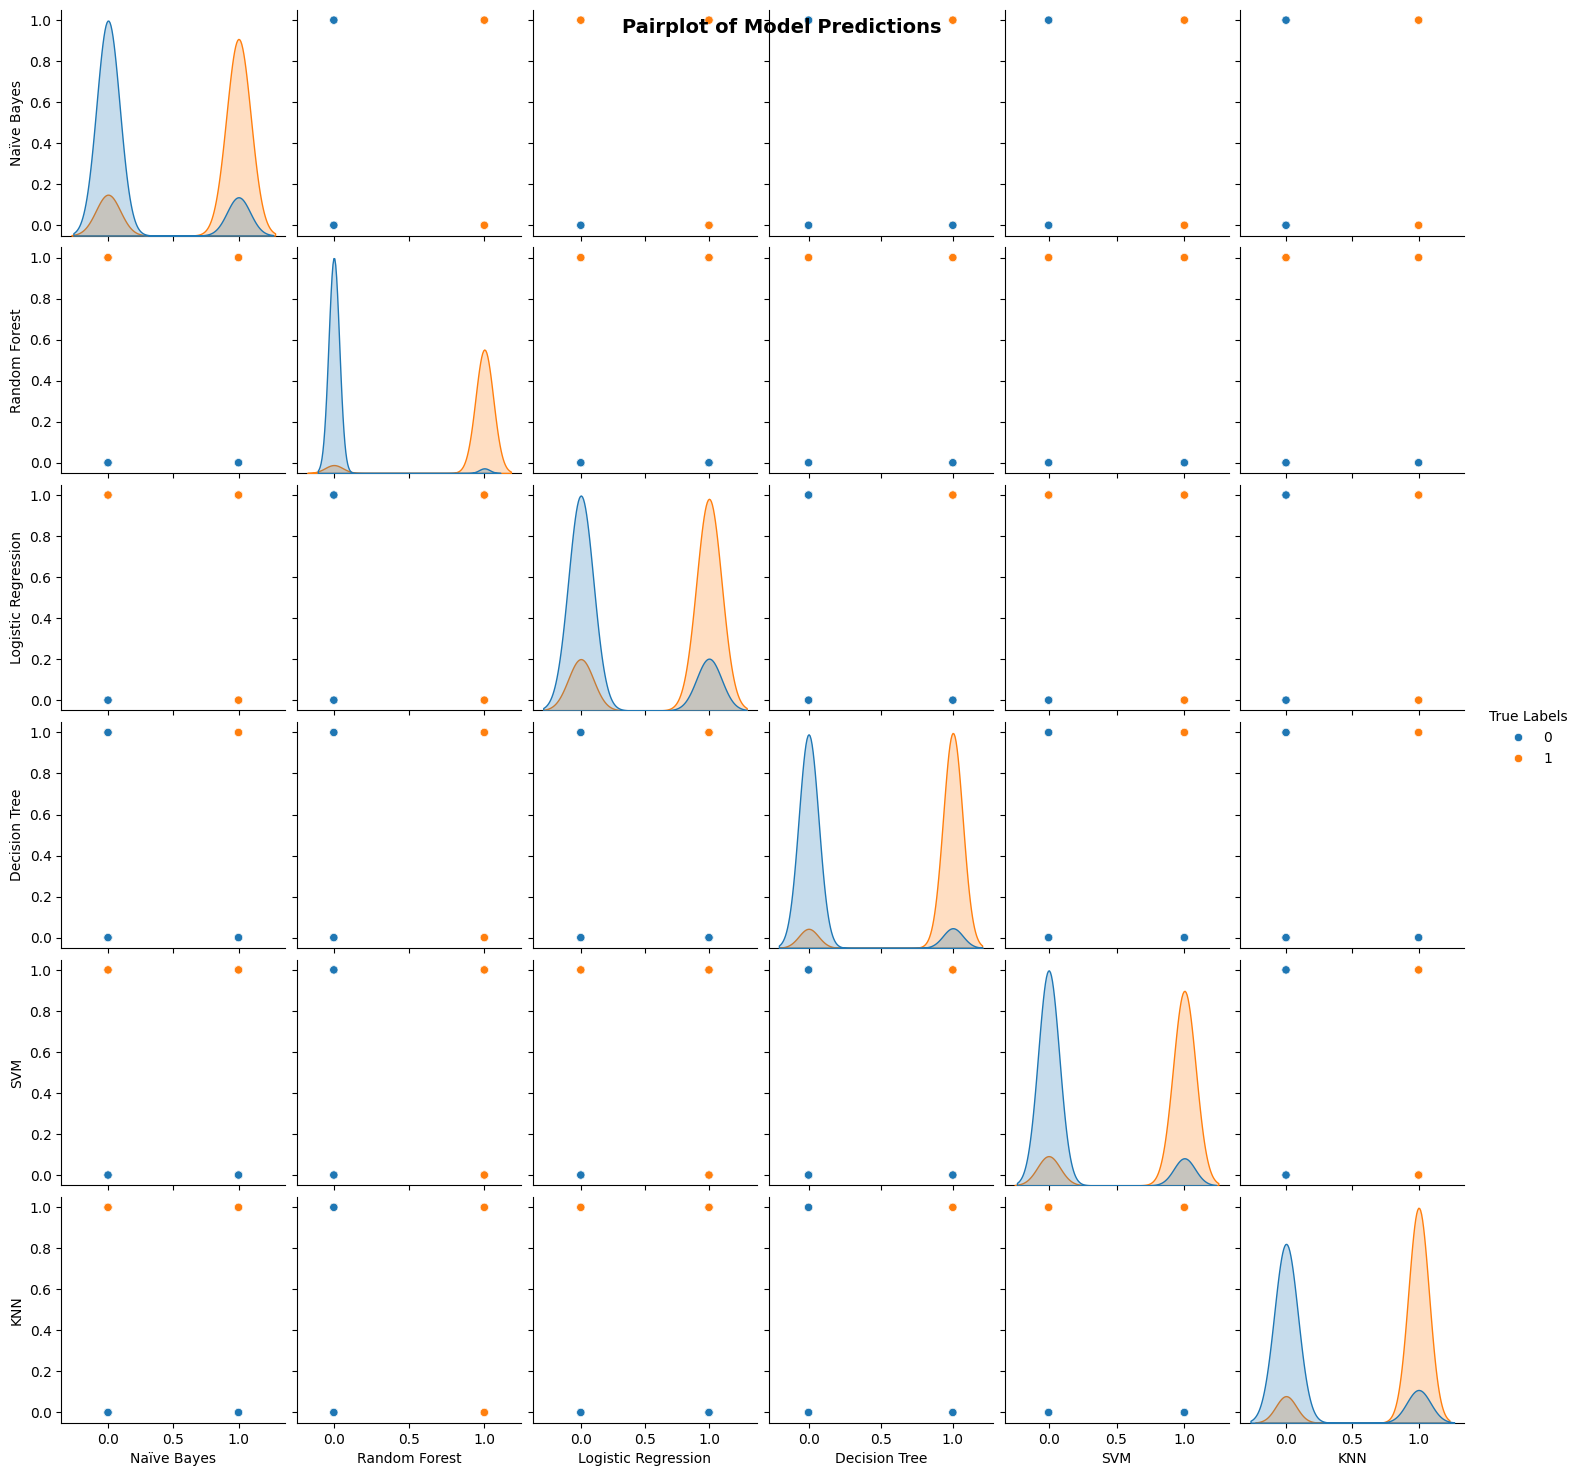

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
model_names = ["Naïve Bayes", "Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Updated color palette
model_data = pd.DataFrame({
    "Naïve Bayes": NB_model,
    "Random Forest": RF_model,
    "Logistic Regression": LR_model,
    "Decision Tree": DT_model,
    "SVM": SVM_model,
    "KNN": KNN_model,
    "True Labels": Ytest
})

# Pairplot
sns.pairplot(model_data, hue="True Labels", palette=colors[:2])
plt.suptitle("Pairplot of Model Predictions", fontsize=14, fontweight="bold")
plt.show()

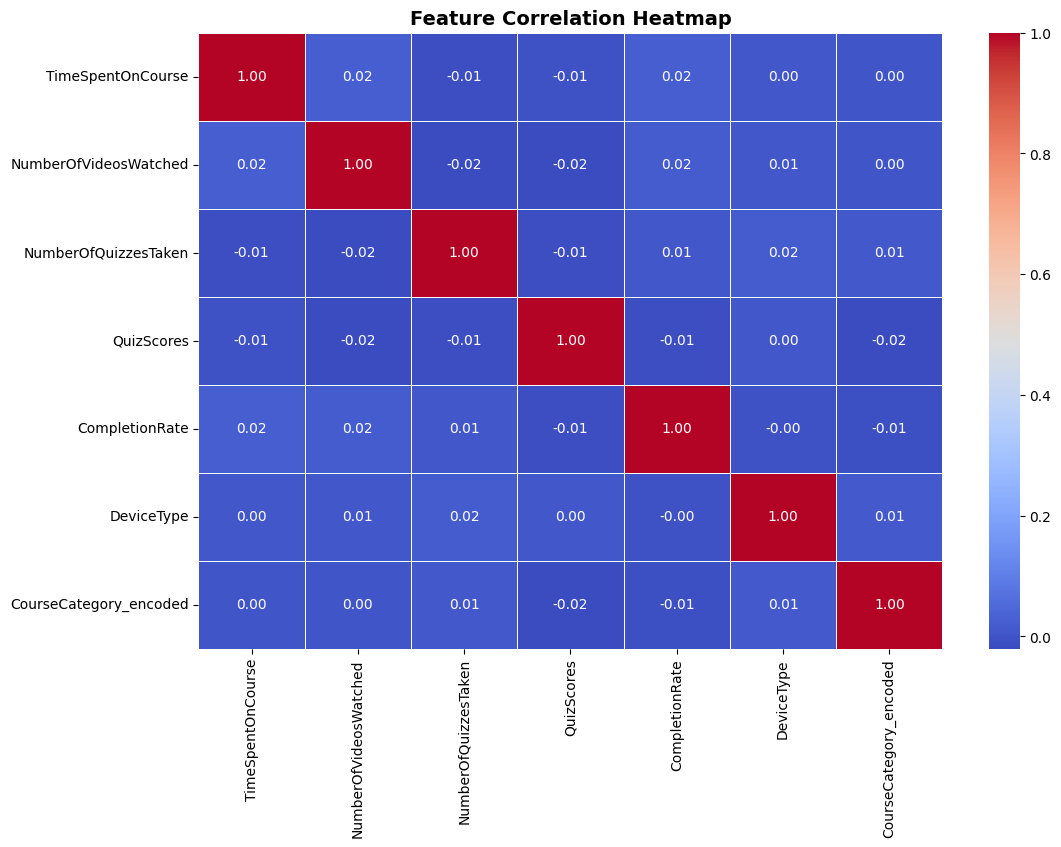

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
feature_columns = df.drop(columns=['CourseCompletion'])
# Heatmap for Feature Correlation
plt.figure(figsize=(12, 8))
corr_matrix = feature_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

XAI- SHAP

<Figure size 640x480 with 0 Axes>

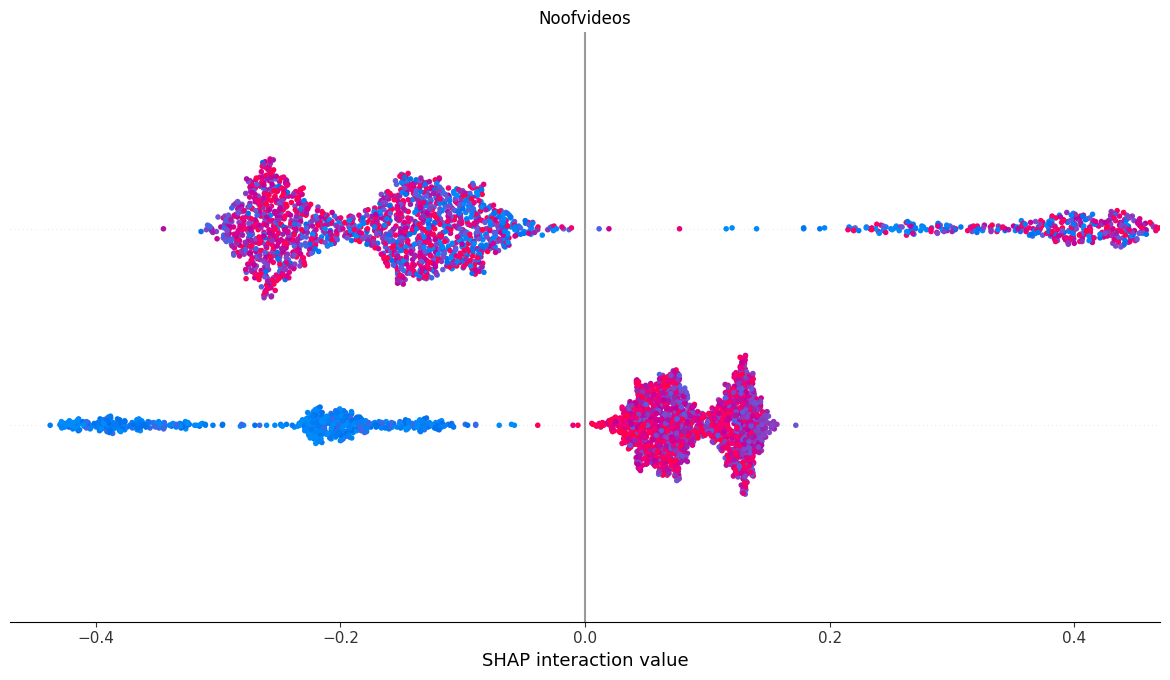

<Figure size 2000x800 with 0 Axes>

In [ ]:
import shap
#RANDOM FOREST
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer.shap_values(Xtest)
shap_values
shap.summary_plot(shap_values, Xtest, feature_names=X.columns.tolist(),show=False)
plt.figure(figsize=(20, 8))
plt.tight_layout(pad=3.0)
plt.show()

  0%|          | 0/2173 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

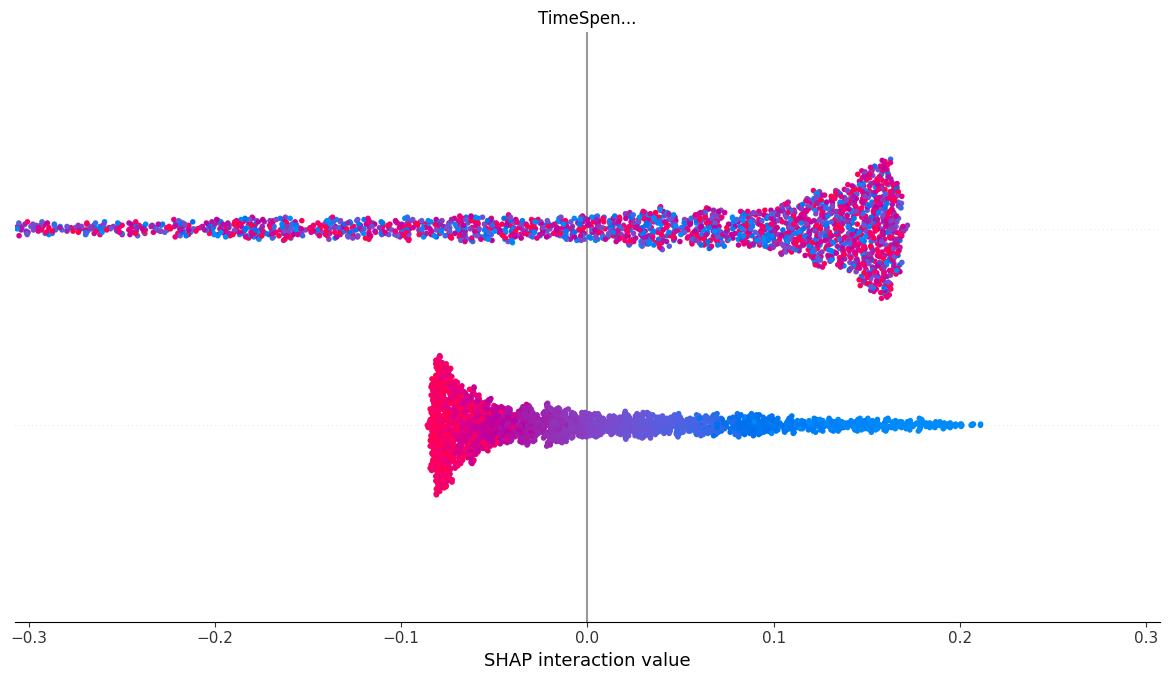

<Figure size 2000x800 with 0 Axes>

In [ ]:
import shap
#NAIVE BAYES
explainer = shap.KernelExplainer(model_NB.predict_proba,Xtrain)
shap_values = explainer.shap_values(Xtest)
shap_values
shap.summary_plot(shap_values, Xtest, feature_names=X.columns.tolist(),show=False)
plt.figure(figsize=(20, 8))
plt.tight_layout(pad=3.0)
plt.show()

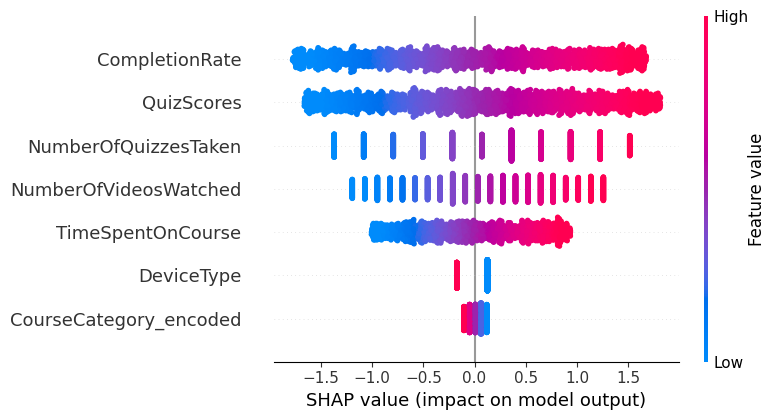

<Figure size 2000x800 with 0 Axes>

In [ ]:
#LOGISTIC REGRESSION
iner = shap.Explainer(model_LR, Xtrain)
shap_values = explainer(Xtest)
shap.summary_plot(shap_values, Xtest, feature_names=X.columns.tolist(),show=False)
plt.figure(figsize=(20, 8))
plt.tight_layout(pad=3.0)
plt.show()


<Figure size 640x480 with 0 Axes>

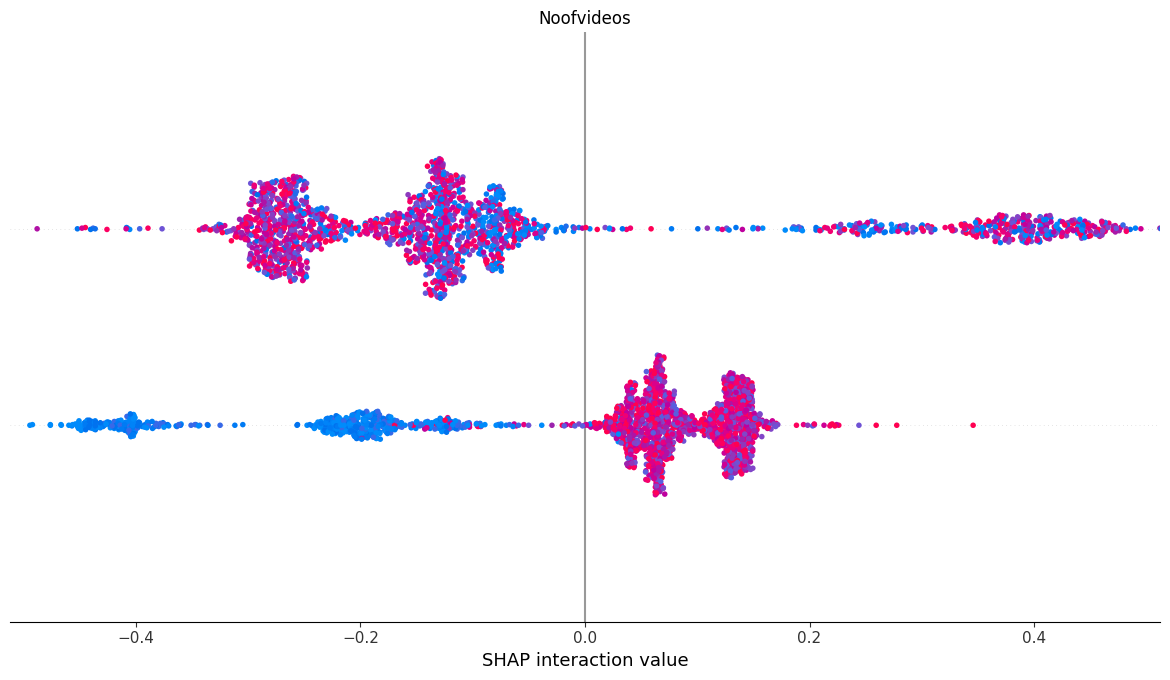

<Figure size 2000x800 with 0 Axes>

In [ ]:
#DECISION TREE
explainer = shap.TreeExplainer(model_DT)
shap_values = explainer.shap_values(Xtest)
shap_values

shap.summary_plot(shap_values, Xtest, feature_names=X.columns.tolist(),show=False)
plt.figure(figsize=(20, 8))
plt.tight_layout(pad=3.0)
plt.show()